<a href="https://colab.research.google.com/github/siriwat-heart/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

#1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data 

In [ ]:
Name = 'ศิริวัฒน์ ภูลำสัตย์'
ID = '6230207650'

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

020:30:19


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.701053,-6.716733,0.403364,8.234690,-8.066837,-2.969272,-1.286681,-2.798265,-9.434770,-6.585169,7.514024,-5.458482,-9.662730,0.537632,1.835089,-3.167337,9.810909,-6.315188,9.017869,-2.029059,5.476176,0.715766,-7.416330,-7.806251,9.232618,8.409526,6.286528,-2.080765,-1.946039,5.766268,-13.433466,30.831342
1,4.841694,9.280394,5.654291,-3.599408,-5.216423,-4.875522,11.564998,2.582919,7.268002,-9.161972,6.814420,-10.976289,-9.452713,-8.650234,-5.160244,-2.122332,11.510111,10.001235,1.100650,4.305707,-8.897800,5.286709,-8.570399,-4.133147,8.891458,-3.532263,6.349222,-0.239454,3.451313,4.345222,18.560788,23.726110
2,-0.188645,2.192432,-3.740707,-4.352023,6.094169,-9.596532,-4.308490,-6.889333,-5.077756,1.258608,-6.810207,-2.277972,2.577195,-2.932891,-2.938483,1.938843,6.440925,-2.161827,-10.726694,8.769474,6.872000,-4.019564,4.486527,-1.790280,3.444224,-7.158424,-7.046810,7.500269,8.608146,-6.347430,4.384863,-29.737152
3,1.070325,-4.596020,-6.293644,11.475116,-2.808209,1.518051,-7.053902,4.258510,3.218390,4.061030,6.367516,6.645035,-1.217043,8.827455,-11.346177,5.971061,6.831416,1.345803,3.357612,7.763393,-1.969457,-1.002429,-1.091993,4.763577,-10.140268,-7.034817,-7.012771,7.431734,-6.320076,3.040692,-9.192040,17.203462
4,-6.795409,-3.422134,-7.935199,5.704634,6.601110,-10.263675,9.217757,6.769842,4.182693,3.637057,-7.968196,-1.315642,9.280129,-2.030549,-8.638449,-5.767849,0.435129,-8.158601,2.004322,-8.079486,-2.890066,-7.521663,3.418707,-4.440289,3.099145,3.605520,-1.421144,-10.701892,10.955527,2.214531,-6.844268,13.072654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.228056,6.839652,5.688027,5.059781,-9.822777,8.527898,9.581539,-5.941708,4.019455,-1.991152,-1.039847,3.131037,8.287049,6.791250,8.476287,3.919213,-7.350831,6.703071,-4.241985,0.331566,8.358831,-0.458548,7.436097,9.914771,8.944351,-4.316166,-5.774025,-7.241011,-0.100094,7.654443,13.679304,40.272216
9996,3.874110,-3.381571,-5.827415,10.433695,2.009930,4.842115,-6.144390,4.278543,3.174105,6.071067,8.091267,6.234274,-1.376929,8.841083,-8.938951,6.276817,6.379705,0.849872,3.258522,10.383427,-2.332721,-0.398124,0.094108,4.194007,-8.157674,-7.813417,-6.653850,5.263005,-2.912163,1.642549,-6.763143,10.212746
9997,2.723442,-8.816045,7.226316,9.642599,-3.002382,1.185427,-0.529747,6.702167,-7.207471,10.747197,7.174096,0.069767,2.317635,6.258422,-0.432146,-3.708092,-7.267421,2.333919,2.544128,0.902972,7.557652,-5.001459,-4.342318,-3.762169,-4.423610,4.586694,-7.123318,2.317072,5.545957,-10.469733,-17.632089,-50.348664
9998,-6.870815,-2.104393,-8.007465,9.810235,7.760187,-8.250139,8.150071,7.945936,6.862951,4.200982,-7.341678,-2.715077,11.188661,-2.081114,-7.773971,-7.525738,-2.642424,-10.417773,4.039373,-7.889138,-1.538853,-6.396142,4.206817,-5.607508,3.995322,3.321244,-5.785854,-9.029805,10.328162,2.925788,-4.208785,16.628938


###เนื่องจากข้อมูลข้างต้นมีจำนวนมาก จึงต้องตัดตัวที่มี Correlation ออกไป เพื่อลดข้อมูลที่ไม่จำเป็นออกไป

##ตรวจสอบขนาดของข้อมูล

In [ ]:
Data.shape

(10000, 32)

In [ ]:
corr = np.corrcoef(Data.to_numpy().T)

In [ ]:
corr.shape

(32, 32)

In [ ]:
corr

array([[ 1.        ,  0.07765901,  0.07928259, ...,  0.20383151,
         0.07765901,  0.20383151],
       [ 0.07765901,  1.        ,  0.15362148, ...,  0.06078046,
         1.        ,  0.06078046],
       [ 0.07928259,  0.15362148,  1.        , ..., -0.11973798,
         0.15362148, -0.11973798],
       ...,
       [ 0.20383151,  0.06078046, -0.11973798, ...,  1.        ,
         0.06078046,  1.        ],
       [ 0.07765901,  1.        ,  0.15362148, ...,  0.06078046,
         1.        ,  0.06078046],
       [ 0.20383151,  0.06078046, -0.11973798, ...,  1.        ,
         0.06078046,  1.        ]])

###เนื่องจากมีจำนวนข้อมูลที่มาก จึงต้องหาค่า Correlation ที่ซ้ำกัน

In [ ]:
for i in range(corr.shape[0]): #ใช้คำสั่งวนลูปเพื่อดูค่าที่ซ้ำกัน พิจารณาจากค่าที่แสดงผล ถ้ามีการแสดงผลแสดงว่ามีค่าซ้ำ
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


#2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ

In [ ]:
from sklearn.cluster import KMeans

####1.Defind ทำการกำหนดค่า k ที่เราต้อวงการ 
####2.กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะkmeanมีdefult)
####3.random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=2021)

In [ ]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

####จุดที่คำนวณได้

In [ ]:
kmeans.cluster_centers_

array([[ -1.08780549,  -2.29607055,  -0.98298195,   0.14346779,
          0.5527234 ,   0.07089763,  -1.70616748,  -1.73697949,
         -3.58114554,   4.34622829,   0.79279007,   1.93817897,
          3.79825024,   3.8128724 ,  -1.20532033,   2.60390476,
          3.16344582,   2.07233784,  -5.92159968,   1.22279113,
         -0.44676379,  -1.13328253,  -1.31608209,   0.50623549,
         -1.43159518,  -1.17396953,  -0.59336161,  -1.99722839,
          1.55145501,  -7.41109493,  -4.59214109, -35.05547467],
       [  1.27481937,   2.71835787,  -2.1760495 ,   1.51074048,
          1.34231573,  -1.63041974,   2.69802951,   2.10630659,
          3.99868411,  -2.29097958,   0.67783007,  -0.42214799,
         -1.31571444,  -1.15031994,  -3.9202539 ,  -0.43477137,
         -0.07970473,   1.7704335 ,   1.49111206,  -1.84092775,
          1.06085039,  -0.99374174,  -0.44939261,  -2.28596322,
          3.93207715,  -3.04221617,   0.55713411,   2.03299143,
          1.33987907,   2.3609091 ,   5

####ทำการทดสอบการจัดกลุ่มของ Data

In [ ]:
H = kmeans.predict(Data)
H

array([2, 1, 0, ..., 0, 1, 0], dtype=int32)

####ทำ PCA ลด Dimention

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(Data)

In [ ]:
import matplotlib

In [ ]:
matplotlib.rcParams['figure.figsize']=[15,20]

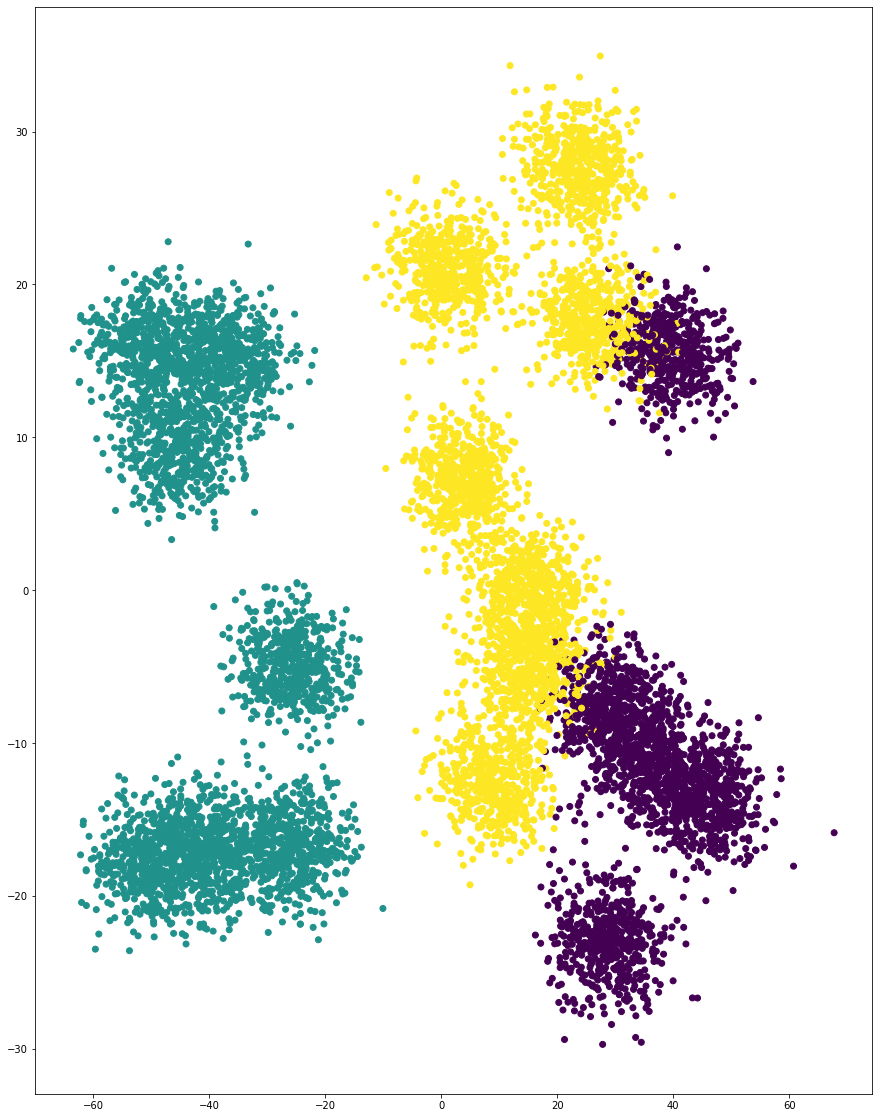

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=H)

####หาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data

####การหาค่า k ด้วยวิธี The elbow method

####โดยเริ่มจากการคำนวณหาค่า SSE ของ data

In [ ]:
kmeans.inertia_

10776718.895710021

In [ ]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE

[21350325.789858438,
 12393046.099239781,
 10776718.895710021,
 9738911.172012035,
 8879612.274629781,
 8063629.856036617,
 7364694.483401365,
 6439989.808714021]

####จากนั้นทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม

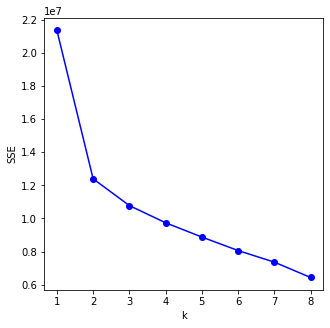

In [ ]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

#### จากกราฟ จะเห็นว่าจุด 1-2 มีระยะห่างอีกแบบ แต่ตั้งแต่จุดสองเป็นต้นไประยะห่างระหว่างจุดมีค่าใกล้เคียงกัน ดังนั้น ค่า K ที่เหมาะสม คือ 2 กลุ่ม

####การหาค่า k ด้วยวิธี The silhouette coefficient

In [ ]:
from sklearn import metrics

In [ ]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

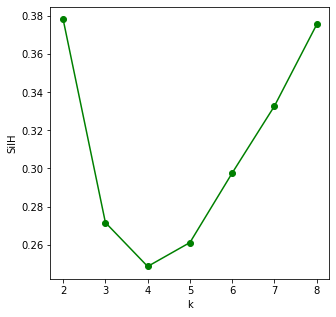

In [ ]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');

####จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม ดูค่าได้โดยมีจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงที่ k เท่ากับ 2 , 3 และ 6

####การทดลองนำค่า ที่ได้นั้นมาเเบ่งกลุ่ม

In [ ]:
matplotlib.rcParams['figure.figsize']=[15,20]

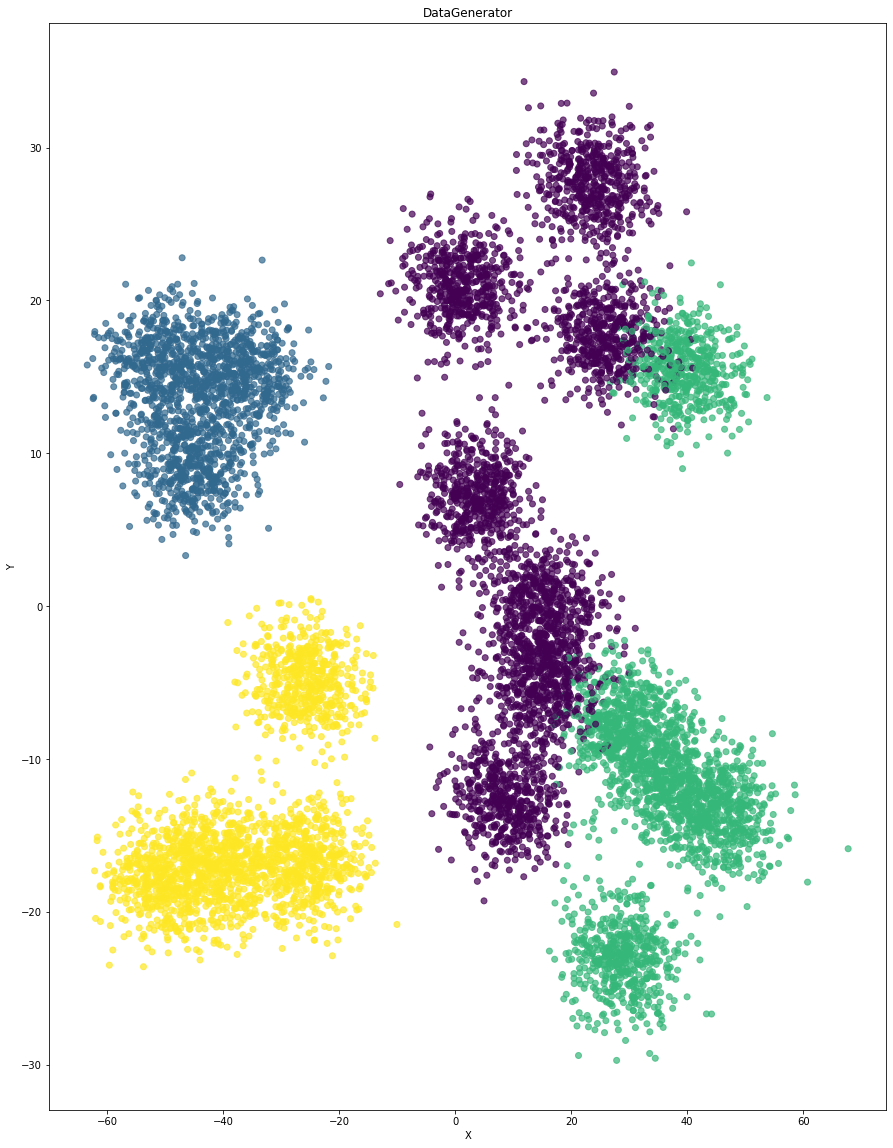

In [ ]:
kmeans = KMeans(n_clusters = 4,random_state=2021)
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

####จากกราฟ จะเห้นว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 4 กลุ่มแล้ว จะมีข้อมูลบางจำนวนที่ทับซ้อนกัน และะเห็นได้ว่าข้อมูลชุดนี้ปริมาณที่มาก

#3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ


###MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(Data)

###K-mean

In [ ]:
kmeans_2 = KMeans(n_clusters=4,random_state=2021)
kmeans_2.fit(Data)
P = kmeans_2.predict(Data)

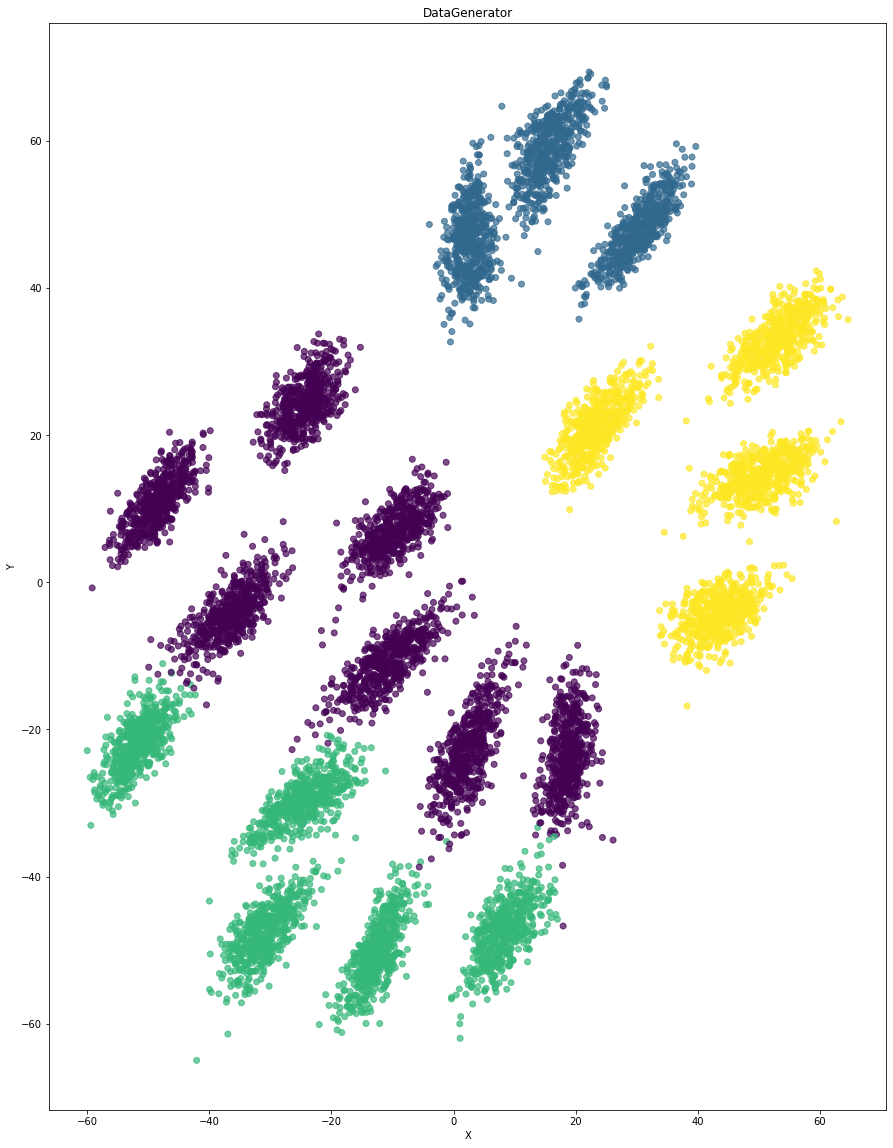

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=P,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

#4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

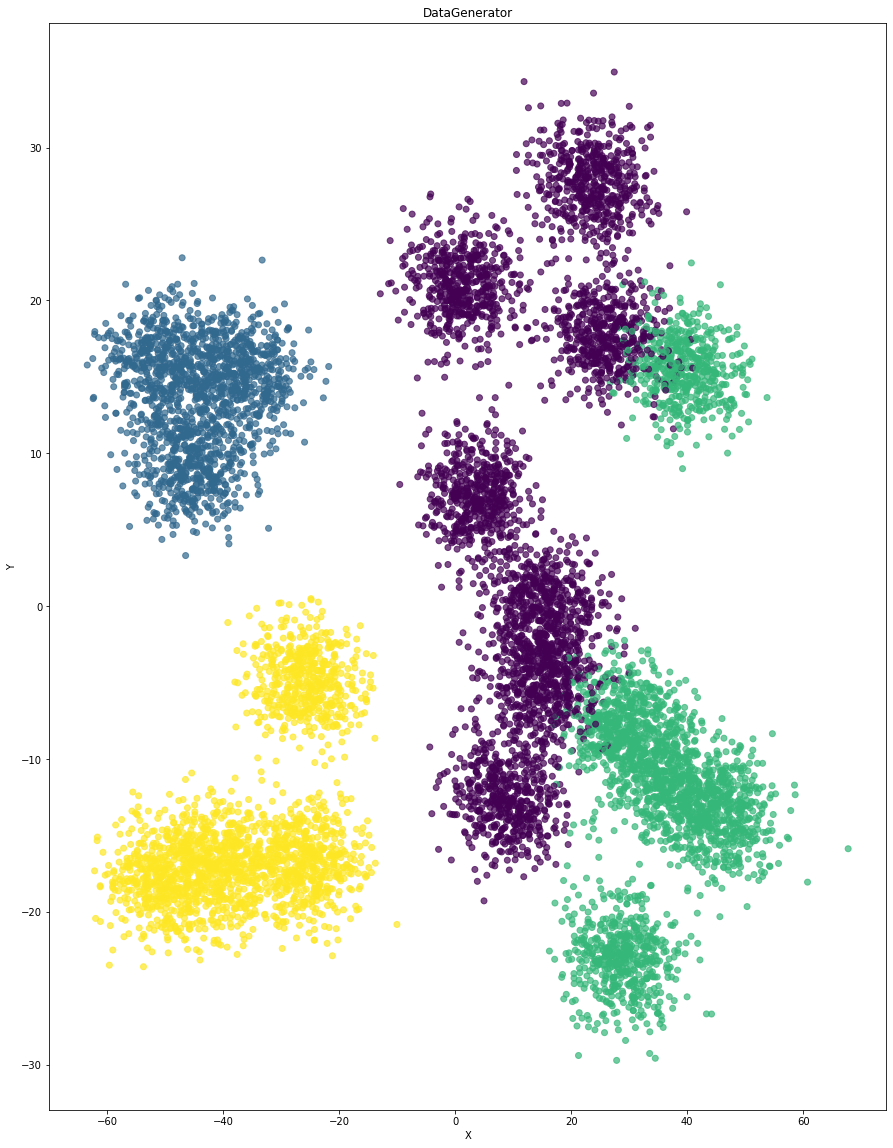

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

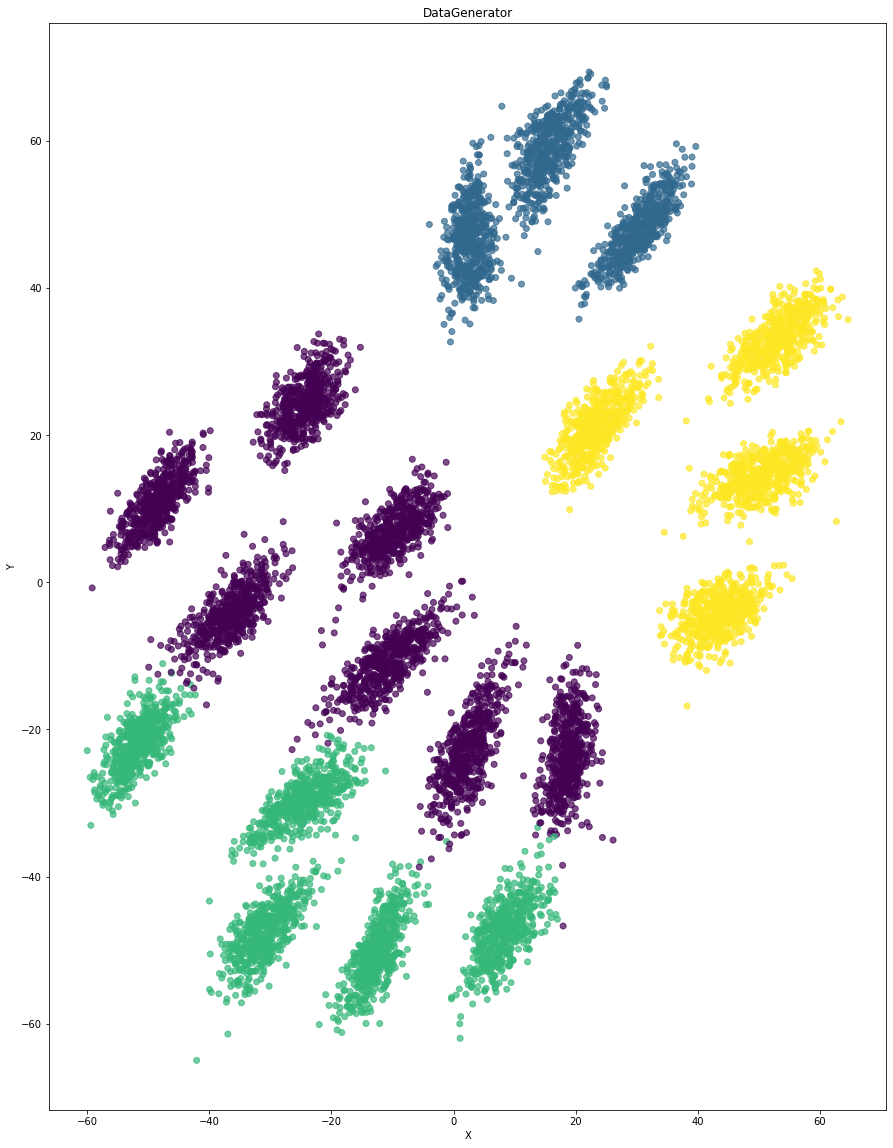

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=P,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');